# Import libraries

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
import numpy as np
import math
warnings.filterwarnings("ignore")

In [96]:
# Load the dataset
data = pd.read_csv('student_data.csv')


# Data Preprocessing

In [97]:
# Rename columns
data = data.rename(columns={'school': 'School', 'sex':'Sex', 'age':'Age',
                   'address':'HomeLoc','famsize':'FamSize', 'reason':'Reason', 
                    'guardian': 'Guardian','traveltime':'TravelTime','studytime':'StudyTime',
                  'failures':'Failures','schoolsup':'SchoolSup','famsup':'FamSup','paid':'Paid',
                  'activities':'Activities','nursery':'Nursery','higher':'Higher',
                   'internet':'Internet','romantic':'Romantic','famrel':'FamRel',
                   'freetime':'FreeTime','goout':'GoOut','health':'Health','absences':'Absences'})

# Complete EDA

In [98]:
# dataset summary
def summarize_dataset(df):
    summary = pd.DataFrame({
        'Missing_Values': data.isna().sum(),
        'Unique_Values': data.nunique(),
        'Data_Type': data.dtypes,
        'Distinct_Values_Sample': data.apply(lambda x: x.dropna().unique()[:5].tolist())  # First 5 unique values
    }).reset_index()

    summary.rename(columns={'index': 'Column_Name'}, inplace=True)
    return summary

In [99]:
dataset_summary = summarize_dataset(data)
dataset_summary

,Column_Name,Missing_Values,Unique_Values,Data_Type,Distinct_Values_Sample
0,School,0,2,object,"[GP, MS]"
1,Sex,0,2,object,"[F, M]"
2,Age,0,8,int64,"[18, 17, 15, 16, 19]"
3,HomeLoc,0,2,object,"[U, R]"
4,FamSize,0,2,object,"[GT3, LE3]"
5,Pstatus,0,2,object,"[A, T]"
6,Medu,0,5,int64,"[4, 1, 3, 2, 0]"
7,Fedu,0,5,int64,"[4, 1, 2, 3, 0]"
8,Mjob,0,5,object,"[at_home, health, other, services, teacher]"
9,Fjob,0,5,object,"[teacher, other, services, health, at_home]"


In [100]:
# histogram for all variable
def plot_hist_numeric(data):

    numeric_data = data.select_dtypes(include=['float64', 'int64'])

    fig, axes = plt.subplots(4, 4, figsize=(20, 15)) 
    axes = axes.flatten() 

    for i, col in enumerate(numeric_data.columns):
        sns.histplot(data[col], kde=True, bins=30, ax=axes[i])
        patches = axes[i].patches
        colors = plt.cm.viridis(np.linspace(0, 1, len(patches)))
        for patch, color in zip(patches, colors):
            patch.set_facecolor(color)
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=10)
        axes[i].set_ylabel('Frequency/Density', fontsize=10)

    if len(numeric_data.columns) < len(axes):
        for j in range(len(numeric_data.columns), len(axes)):
            fig.delaxes(axes[j])

    plt.tight_layout() 
    plt.show()

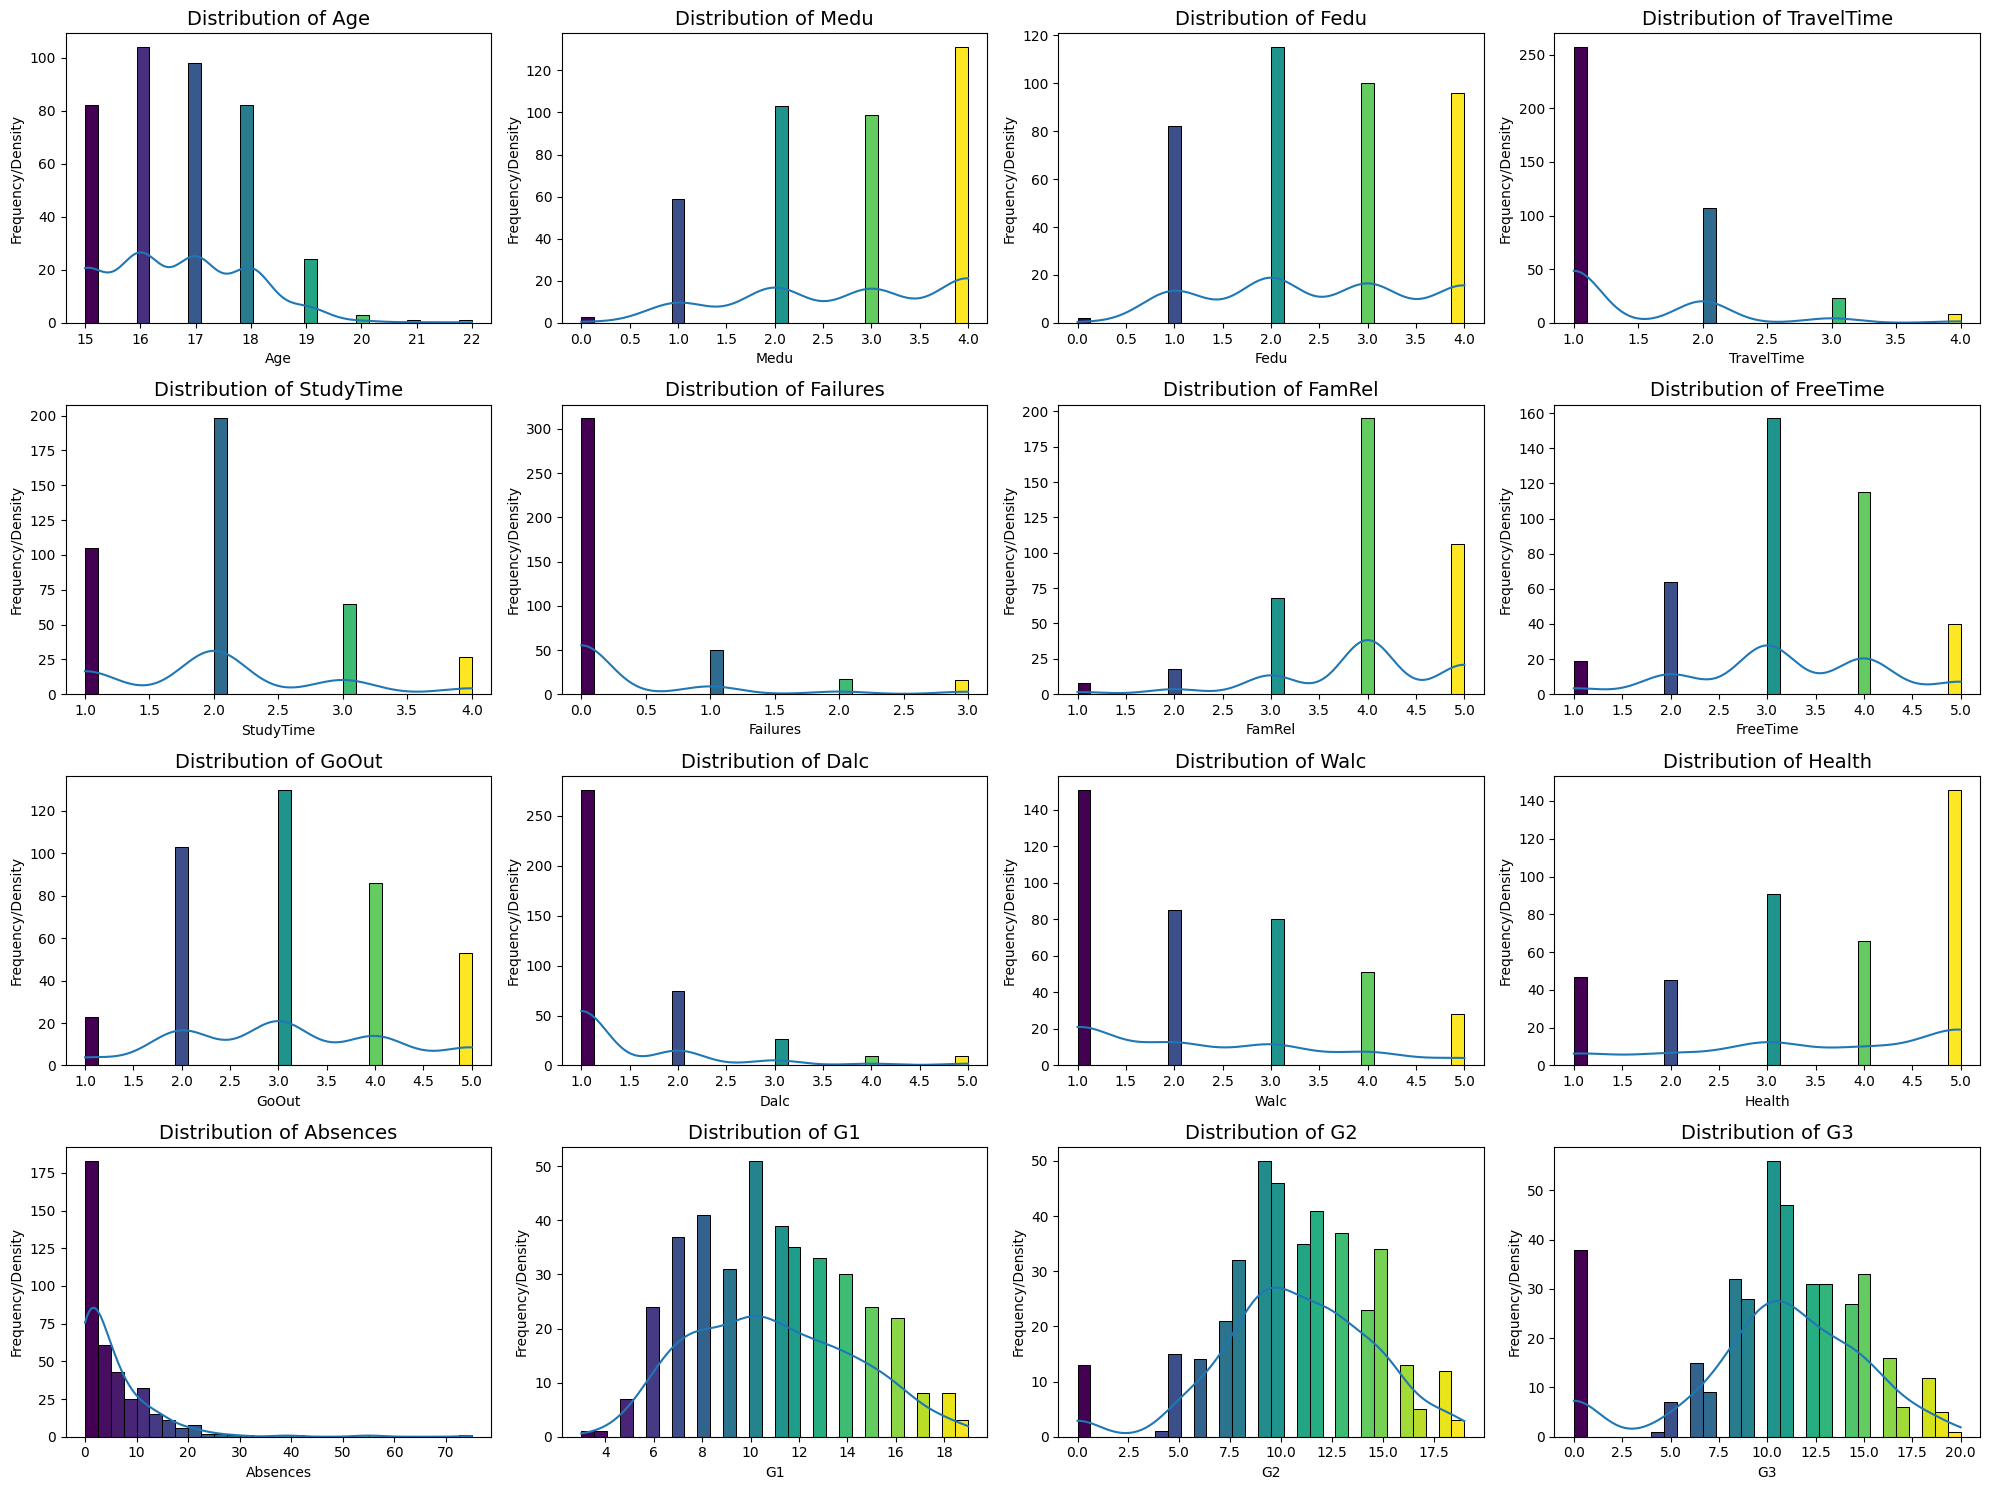

In [101]:
plot_hist_numeric(data)

In [102]:
# Option1: histogram
# def plot_categorical_columns(data, nrows=6, ncols=3, figsize=(20, 15)):
#     categorical_cols = data.select_dtypes(include=['object', 'category'])
    
#     fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
#     axes = axes.flatten()
    
#     for i, col in enumerate(categorical_cols):
#         if i < len(axes):
#             sns.countplot(data=data, x=col, palette="viridis", ax=axes[i])
#             axes[i].set_title(f'{col} Distribution', fontsize=14)
#             axes[i].set_xlabel(col, fontsize=10)
#             axes[i].set_ylabel('Frequency', fontsize=10)
#             axes[i].tick_params(axis='x', rotation=0)

#     if len(categorical_cols) < len(axes):
#         for j in range(len(categorical_cols), len(axes)):
#             fig.delaxes(axes[j])
    
#     plt.tight_layout()
#     plt.show()

In [103]:
# plot_categorical_columns(data)

In [104]:
# Option2
def plot_categorical_pie_charts(data, n_rows=3, n_cols=6, figsize=(18, 10)):
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
    num_plots = len(categorical_cols)

    total_subplots = n_rows * n_cols
    if num_plots < total_subplots:
        n_rows = (num_plots + n_cols - 1) // n_cols 
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        data[col].value_counts(normalize=True).plot.pie(
            autopct='%1.1f%%',
            startangle=90,
            colors=plt.cm.Paired.colors,
            ax=axes[i],
            labeldistance=None
        )
        axes[i].set_title(f'{col} Distribution', fontsize=10)
        axes[i].set_ylabel('')
        axes[i].legend(
            loc='upper left',
            labels=data[col].value_counts().index.astype(str),
            fontsize=8
        )

    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

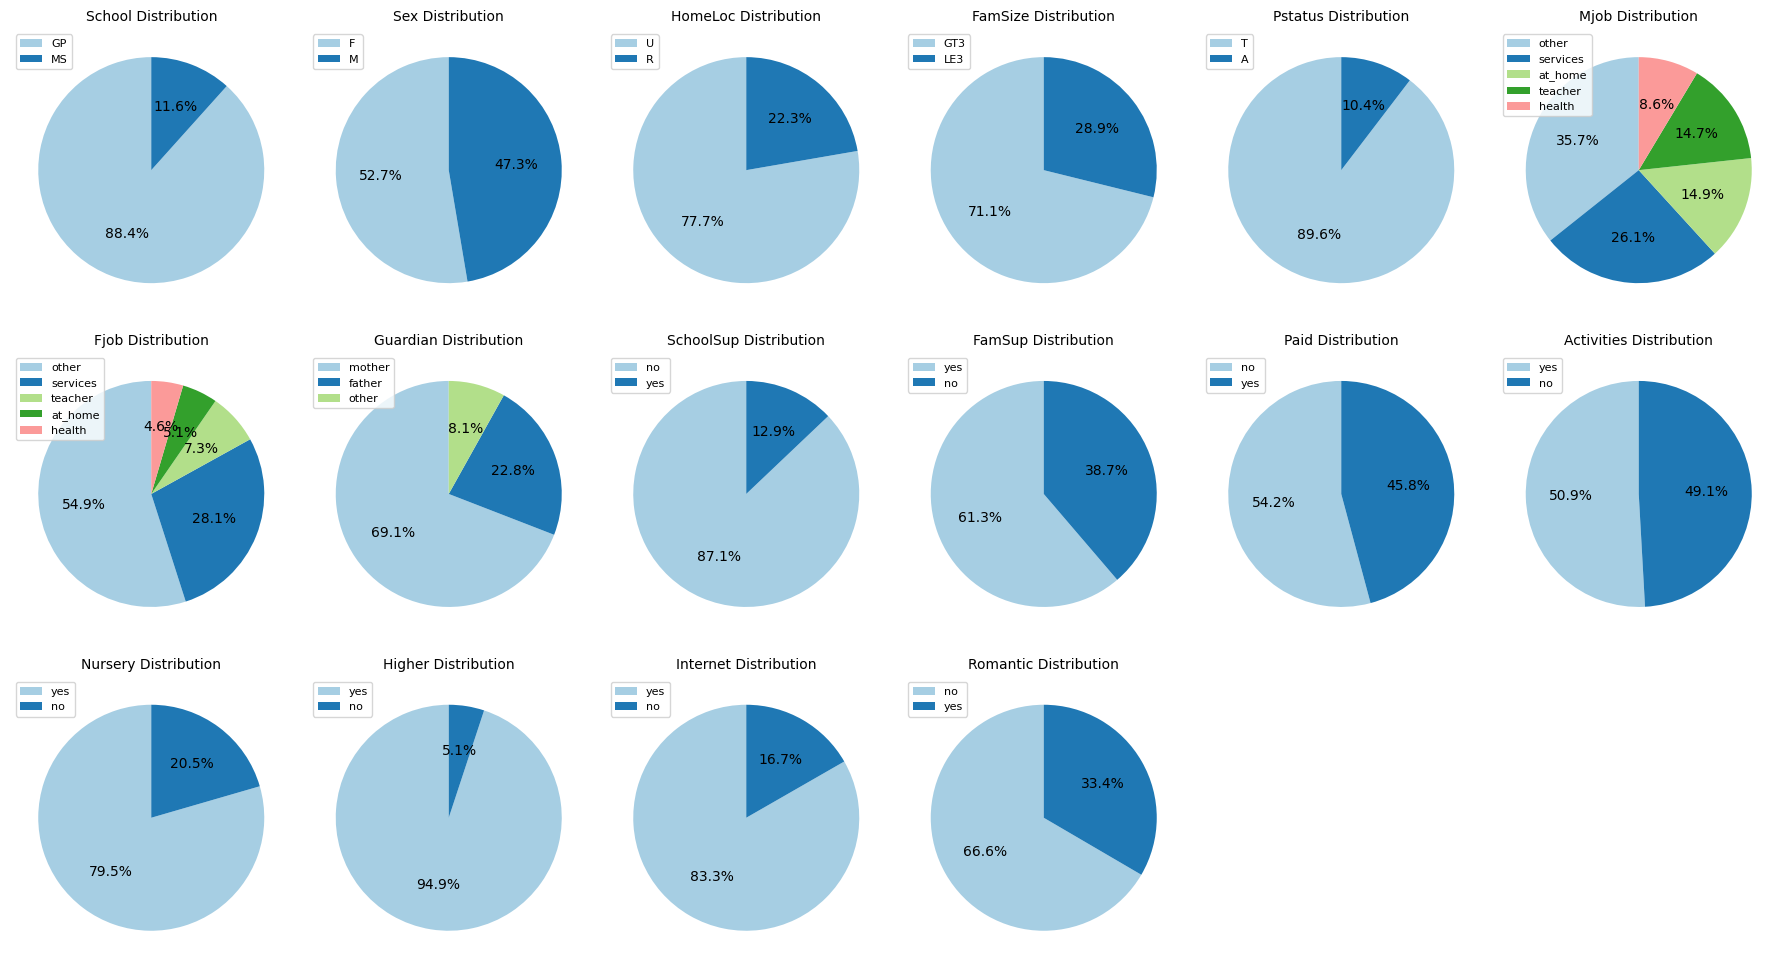

In [105]:
plot_categorical_pie_charts(data)

In [106]:
# function for heatmap
def plot_heatmap(df):
    """
    Plots a heatmap of the correlation matrix of numerical features in the dataset using matplotlib.
    
    Args:
    df (DataFrame): The input dataframe for analysis.
    """
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(12, 8))
    cax = ax.matshow(corr, cmap='coolwarm')
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title('Heatmap of Correlation Matrix', pad=20)
    plt.show()


In [107]:
# Convert non-numeric features to numeric
non_numeric_features = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for feature in non_numeric_features:
    data[feature] = label_encoder.fit_transform(data[feature])

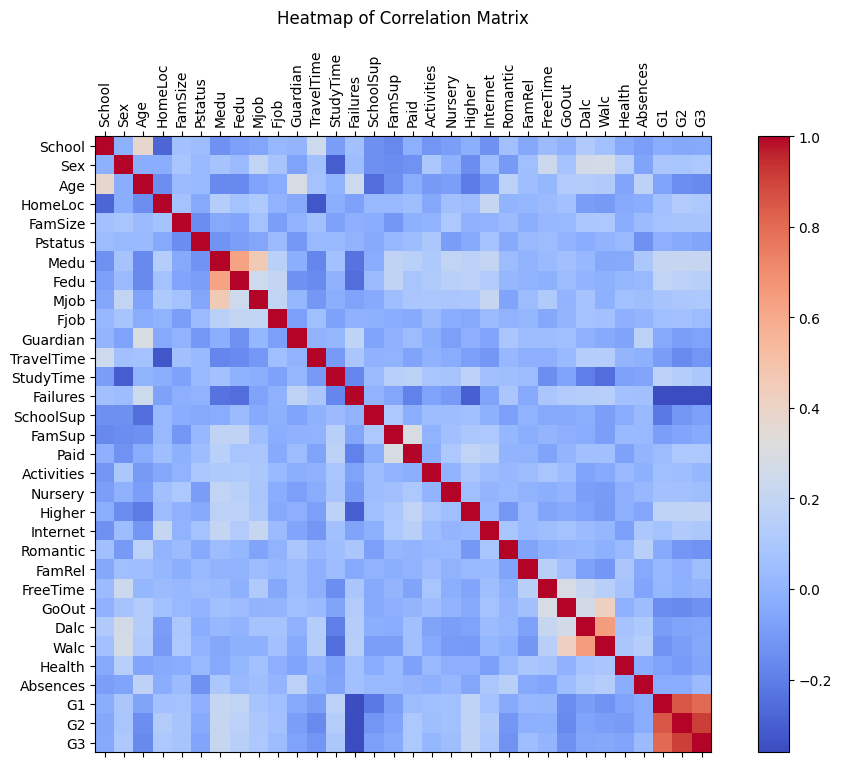

In [108]:
# Plot heatmap of correlation matrix
plot_heatmap(data)

In [109]:
# correlation importance
def plot_feature_importance(df, target_column):
    """
    Plots the feature importance of the dataset using a Random Forest classifier.
    
    Args:
    df (DataFrame): The input dataframe for analysis.
    target_column (str): The name of the target column.
    """
    # Preprocess the data
    label_encoder = LabelEncoder()
    if df[target_column].dtype == 'object':
        df[target_column] = label_encoder.fit_transform(df[target_column])
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Fit RandomForestClassifier to find feature importance
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances_sorted = feature_importances.sort_values(ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.axvline(x=0.04, color='red', linestyle='--', label='Threshold = 0.04')
    sns.barplot(x=feature_importances_sorted, y=feature_importances_sorted.index, palette='viridis')
    plt.title('Feature Importance based on RandomForest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

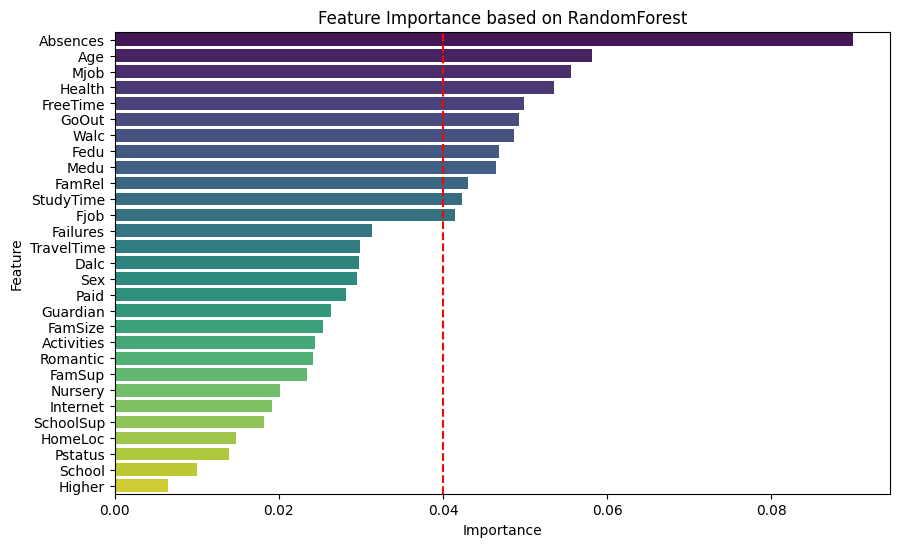

In [110]:
data1 = data.drop(columns=["G1","G2"])
plot_feature_importance(data1, target_column='G3')

In [111]:
def heatmap_detail(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.xticks(rotation=30)
    plt.title("Heatmap of Correlation Matrix")
    plt.show()

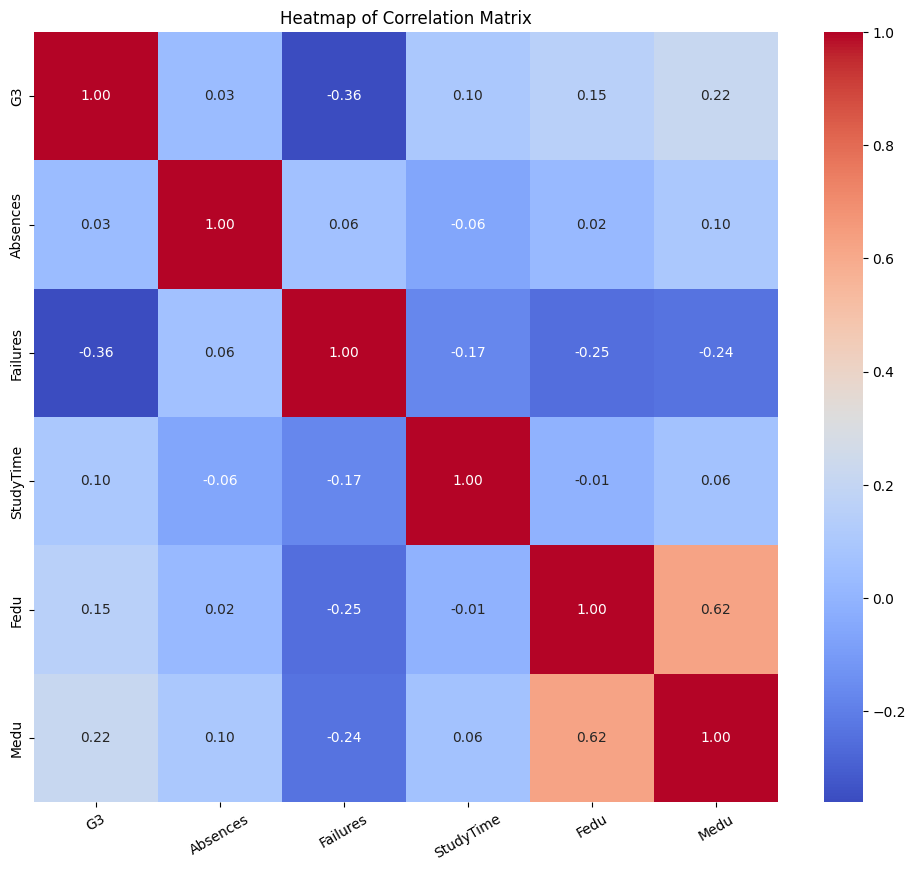

In [112]:
# List of columns you want to keep
selected_columns = ["G3", "Absences", "Failures", "StudyTime", "Fedu", "Medu"]

var = data[selected_columns]
heatmap_detail(var)

# significance tests

Column: failures
T-Statistic: 7.0156, P-Value: 0.0000


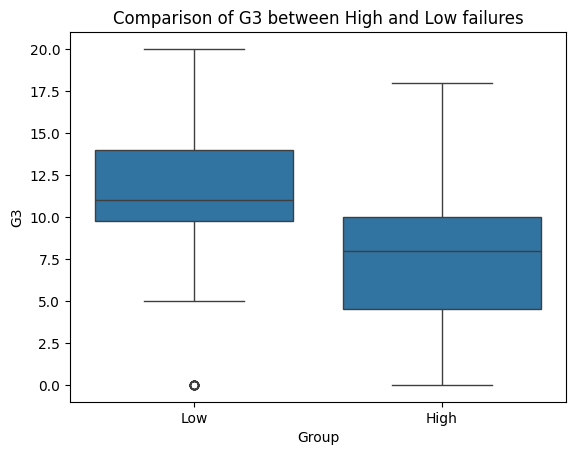

Column: studytime
T-Statistic: -2.1831, P-Value: 0.0307


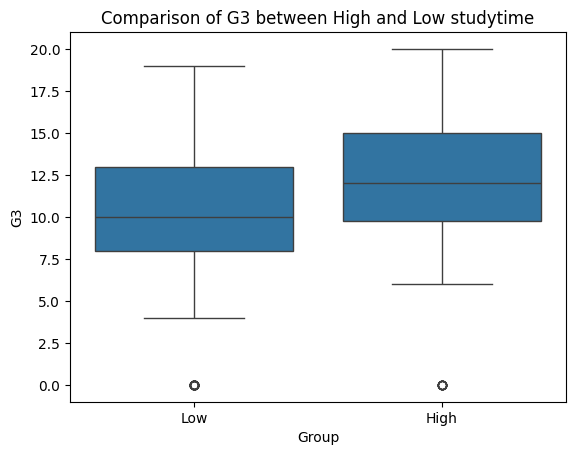

Column: Fedu
T-Statistic: -2.5587, P-Value: 0.0109


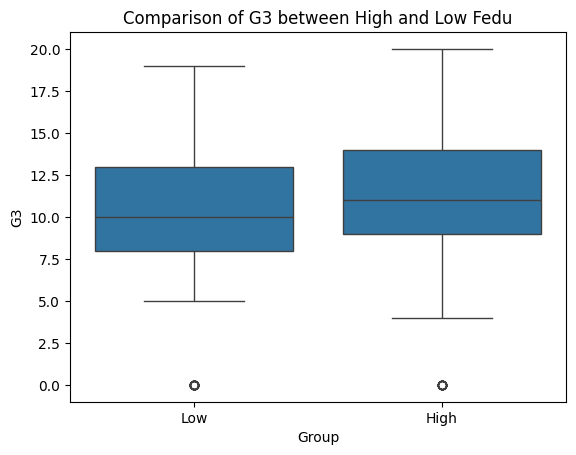

Column: Medu
T-Statistic: -4.3113, P-Value: 0.0000


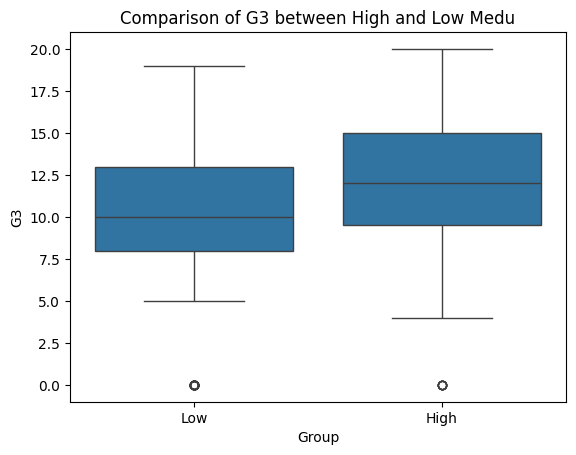

Column: absences
T-Statistic: -1.6819, P-Value: 0.0934


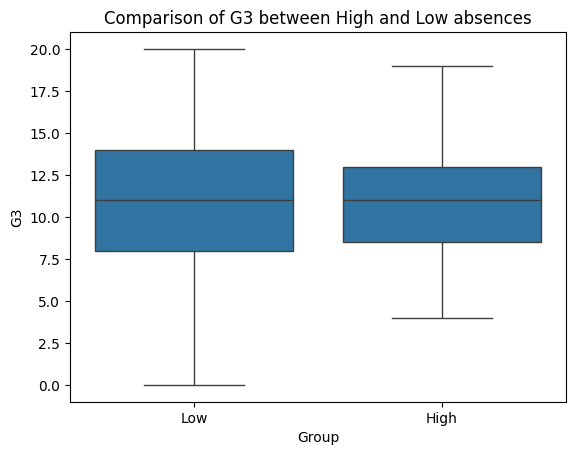

In [113]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    """
    Load the student data from a CSV file.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    DataFrame: The loaded data.
    """
    return pd.read_csv(file_path)

def median_split(df, column):
    """
    Split the DataFrame into two groups based on the median of a specified column.

    Parameters:
    df (DataFrame): The input data.
    column (str): The column name to split the data.

    Returns:
    DataFrame, DataFrame: Low group and high group.
    """
    median_value = df[column].median()
    low_group = df[df[column] <= median_value]
    high_group = df[df[column] > median_value]
    return low_group, high_group

def perform_ttest(low_group, high_group, target_column):
    """
    Perform an independent t-test between two groups for a target column.

    Parameters:
    low_group (DataFrame): The low group data.
    high_group (DataFrame): The high group data.
    target_column (str): The column to test.

    Returns:
    tuple: t-statistic and p-value.
    """
    t_stat, p_val = stats.ttest_ind(low_group[target_column], high_group[target_column], equal_var=False)
    return t_stat, p_val

def visualize_groups(df, column, target_column):
    """
    Visualize the distribution of the target column for high and low groups.

    Parameters:
    df (DataFrame): The input data.
    column (str): The column used for splitting the data.
    target_column (str): The column to visualize.

    Returns:
    None
    """
    low_group, high_group = median_split(df, column)
    sns.boxplot(x='Group', y=target_column, data=pd.concat([
        low_group.assign(Group='Low'),
        high_group.assign(Group='High')
    ]))
    plt.title(f'Comparison of {target_column} between High and Low {column}')
    plt.show()

def analyze_significance(df, columns, target_column):
    """
    Analyze the significance of multiple columns against a target column.

    Parameters:
    df (DataFrame): The input data.
    columns (list): List of columns to analyze.
    target_column (str): The target column for comparison.

    Returns:
    None
    """
    results = {}
    for col in columns:
        low, high = median_split(df, col)
        t_stat, p_val = perform_ttest(low, high, target_column)
        results[col] = {'t_statistic': t_stat, 'p_value': p_val}
        print(f'Column: {col}')
        print(f'T-Statistic: {t_stat:.4f}, P-Value: {p_val:.4f}')
        visualize_groups(df, col, target_column)
    return results

def significance_tests():
    # Define the file path
    file_path = 'student_data.csv'
    
    # Load the data
    df = load_data(file_path)
    
    # Define the columns to analyze
    columns_to_analyze = ['failures', 'studytime', 'Fedu', 'Medu', 'absences']
    target_column = 'G3'
    
    # Perform significance analysis
    results = analyze_significance(df, columns_to_analyze, target_column)
    
    # Optionally, you can save the results to a CSV file
    results_df = pd.DataFrame(results).T
    # results_df.to_csv('significance_results.csv')
    # print("Significance analysis complete. Results saved to 'significance_results.csv'.")

significance_tests()

# Uplift model

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.optimize import linear_sum_assignment
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [115]:
# Load the dataset
def load_data(filepath):
    """
    Load the student data from a CSV file.
    
    Parameters:
        filepath (str): The path to the CSV file.
    
    Returns:
        pd.DataFrame: Loaded data.
    """
    data = pd.read_csv(filepath)
    return data

# Preprocess the data
def preprocess_data(df):
    """
    Preprocess the data by dropping unnecessary columns and encoding categorical variables.
    
    Parameters:
        df (pd.DataFrame): The original dataframe.
    
    Returns:
        pd.DataFrame: Preprocessed dataframe.
    """
    # Drop 'G1' and 'G2' columns
    df = df.drop(['G1', 'G2'], axis=1)
    
    # Identify numerical and categorical columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    # Exclude the target and treatment variables
    numeric_cols = [col for col in numeric_cols if col not in ['studytime', 'G3']]
    
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Define transformers for numerical and categorical data
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
    
    # Fit and transform the data
    df_processed = preprocessor.fit_transform(df)
    
    # Get feature names after encoding
    encoded_cols = []
    if numeric_cols:
        encoded_cols += numeric_cols
    if categorical_cols:
        encoded_cols += preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols).tolist()
    
    # Convert to DataFrame
    df_processed = pd.DataFrame(df_processed, columns=encoded_cols)
    
    # Add treatment and outcome variables
    df_processed['studytime'] = df['studytime']
    df_processed['G3'] = df['G3']
    
    return df_processed


In [116]:
def define_treatment_studytime(df, threshold=2):
    """
    Define the treatment variable based on 'studytime' as a binary variable.

    Parameters:
        df (pd.DataFrame): The preprocessed dataframe.
        threshold (int): The threshold to define treated vs control.

    Returns:
        pd.DataFrame: Dataframe with 'treatment' column.
    """
    df['treatment'] = np.where(df['studytime'] > threshold, 1, 0)
    return df

def define_treatment_multiclass(df, thresholds=(1, 3)):
    """
    Define the treatment variable based on 'studytime' with multiple thresholds.

    Parameters:
        df (pd.DataFrame): The preprocessed dataframe.
        thresholds (tuple): Thresholds to define treatment groups.

    Returns:
        pd.DataFrame: Dataframe with 'treatment' column.
    """
    df['treatment'] = pd.cut(
        df['studytime'],
        bins=[-np.inf, thresholds[0], thresholds[1], np.inf],
        labels=[0, 1, 2]
    )
    return df

def define_treatment_fail(df, threshold=-0.4499):
    """
    Define the treatment variable based on 'fail'.
    
    Parameters:
        df (pd.DataFrame): The preprocessed dataframe.
        threshold (int): The threshold to define treated vs control.
    
    Returns:
        pd.DataFrame: Dataframe with 'treatment' column.
    """
    df['treatment'] = np.where(df['failures'] > threshold, 1, 0)
    return df

def define_treatment_father_education(df, threshold = -1.439074e-16):
    """
    Define the treatment variable based on 'Fedu'.
    
    Parameters:
        df (pd.DataFrame): The preprocessed dataframe.
        threshold (int): The threshold to define treated vs control.
    
    Returns:
        pd.DataFrame: Dataframe with 'treatment' column.
    """
    df['treatment'] = np.where(df['Fedu'] > threshold, 1, 0)
    return df

def define_treatment_mother_education(df, threshold = 5.396527e-17):
    """
    Define the treatment variable based on 'Medu'.
    
    Parameters:
        df (pd.DataFrame): The preprocessed dataframe.
        threshold (int): The threshold to define treated vs control.
    
    Returns:
        pd.DataFrame: Dataframe with 'treatment' column.
    """
    df['treatment'] = np.where(df['Medu'] > threshold, 1, 0)
    return df

def define_treatment_absences(df, threshold = 5.396527e-17):
    """
    Define the treatment variable based on 'absences'.
    
    Parameters:
        df (pd.DataFrame): The preprocessed dataframe.
        threshold (int): The threshold to define treated vs control.
    
    Returns:
        pd.DataFrame: Dataframe with 'treatment' column.
    """
    df['treatment'] = np.where(df['absences'] < threshold, 1, 0)
    return df

def train_uplift_models(df, feature_cols, treatment_col='treatment', outcome_col='G3'):
    """
    Train separate XGBoost models for treatment and control groups.
    
    Parameters:
        df (pd.DataFrame): The dataframe with covariates, treatment, and outcome.
        feature_cols (list): List of feature column names.
        treatment_col (str): The treatment column name.
        outcome_col (str): The outcome column name.
    
    Returns:
        model_treated: Trained XGBoost model for treated group.
        model_control: Trained XGBoost model for control group.
    """
    # Split data into treated and control
    treated = df[df[treatment_col] == 1]
    control = df[df[treatment_col] == 0]
    
    X_treated = treated[feature_cols]
    y_treated = treated[outcome_col]
    
    X_control = control[feature_cols]
    y_control = control[outcome_col]
    
    # Define XGBoost regressor
    model_treated = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    model_control = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    
    # Train models
    model_treated.fit(X_treated, y_treated)
    model_control.fit(X_control, y_control)
    
    return model_treated, model_control

def predict_uplift(model_treated, model_control, X):
    """
    Predict uplift by taking the difference between treated and control model predictions.
    
    Parameters:
        model_treated: Trained XGBoost model for treated group.
        model_control: Trained XGBoost model for control group.
        X (pd.DataFrame): Feature matrix.
    
    Returns:
        pd.Series: Predicted uplift values.
    """
    pred_treated = model_treated.predict(X)
    pred_control = model_control.predict(X)
    uplift = pred_treated - pred_control
    return pd.Series(uplift, index=X.index)

def visualize_uplift(uplift):
    """
    Visualize the distribution of uplift scores.
    
    Parameters:
        uplift (pd.Series): Uplift scores.
    
    Returns:
        None
    """
    plt.figure(figsize=(8,6))
    sns.histplot(uplift, kde=True, bins=30)
    plt.xlabel('Uplift Score')
    plt.ylabel('Frequency')
    plt.title('Uplift Score Distribution')
    plt.show()


In [117]:
def compute_qini(qini_df, n_bins=10):
    """
    Compute the Qini coefficient for uplift modeling.

    Parameters:
        qini_df (pd.DataFrame): Dataframe containing 'uplift', 'G3', and 'treatment'.
        n_bins (int): Number of bins to divide the data.

    Returns:
        float: Qini coefficient.
    """
    # Sort by uplift in descending order
    qini_df_sorted = qini_df.sort_values(by='uplift', ascending=False).reset_index(drop=True)
    qini_df_sorted['rank'] = qini_df_sorted.index + 1

    # Assign to strata
    qini_df_sorted['stratum'] = pd.qcut(qini_df_sorted['rank'], q=n_bins, labels=False)

    # Calculate incremental gains per stratum
    qini_scores = []
    for stratum in range(n_bins):
        group = qini_df_sorted[qini_df_sorted['stratum'] == stratum]
        treated = group[group['treatment'] == 1]['G3']
        control = group[group['treatment'] == 0]['G3']
        treated_mean = treated.mean() if not treated.empty else 0
        control_mean = control.mean() if not control.empty else 0
        qini_scores.append(treated_mean - control_mean)

    # Calculate cumulative Qini
    qini_cumulative = np.cumsum(qini_scores)

    # Normalize Qini by the maximum possible
    max_qini = np.sum(sorted(qini_scores, reverse=True))
    qini = qini_cumulative[-1] / max_qini if max_qini != 0 else 0
    return qini

def evaluate_uplift_model(uplift, y_true, treatment):
    """
    Evaluate the uplift model using Qini coefficient.

    Parameters:
        uplift (pd.Series): Predicted uplift scores.
        y_true (pd.Series): True outcomes.
        treatment (pd.Series): Treatment assignments.

    Returns:
        float: Qini coefficient.
    """
    qini_df = pd.DataFrame({
        'uplift': uplift,
        'G3': y_true,
        'treatment': treatment
    })

    qini = compute_qini(qini_df)
    return qini

In [118]:
def run_uplift_model(filepath, treatment_def_func=define_treatment_absences, n_bins=10):
    """
    Run the Uplift Model workflow using XGBoost with the Two-Model Approach.

    Parameters:
        filepath (str): The path to the CSV file.
        treatment_def_func (function): Function to define the treatment variable.
        n_bins (int): Number of bins for Qini coefficient calculation.

    Returns:
        None
    """
    # Load data
    df = load_data(filepath)

    # Preprocess data
    df_processed = preprocess_data(df)

    # Define treatment variable
    df_processed = treatment_def_func(df_processed)

    # If the treatment variable is defined as multi-category, choose one category for uplift modeling
    # Here we assume the treatment variable is binary; if multi-category, make adjustments as needed
    if df_processed['treatment'].dtype.name == 'category':
        # Example: Select category 1 as the primary treatment group, equivalent to binary
        df_processed = df_processed[df_processed['treatment'].isin([1])]
        df_processed['treatment'] = df_processed['treatment'].astype(int)

    # Define feature columns (exclude treatment and outcome variables)
    feature_cols = df_processed.columns.drop(['treatment', 'G3']).tolist()

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test, treat_train, treat_test = train_test_split(
        df_processed[feature_cols],
        df_processed['G3'],
        df_processed['treatment'],
        test_size=0.3,
        random_state=42
    )

    # Combine training data
    train_df = X_train.copy()
    train_df['G3'] = y_train
    train_df['treatment'] = treat_train

    # Train uplift models
    model_treated, model_control = train_uplift_models(train_df, feature_cols)

    # Predict uplift scores
    uplift = predict_uplift(model_treated, model_control, X_test)

    # Visualize uplift distribution
    visualize_uplift(uplift)

    # Evaluate the uplift model
    qini = evaluate_uplift_model(uplift, y_test, treat_test)
    print(f'Qini Coefficient: {qini:.4f}')

    # print("\nUplift Modeling with XGBoost completed.")

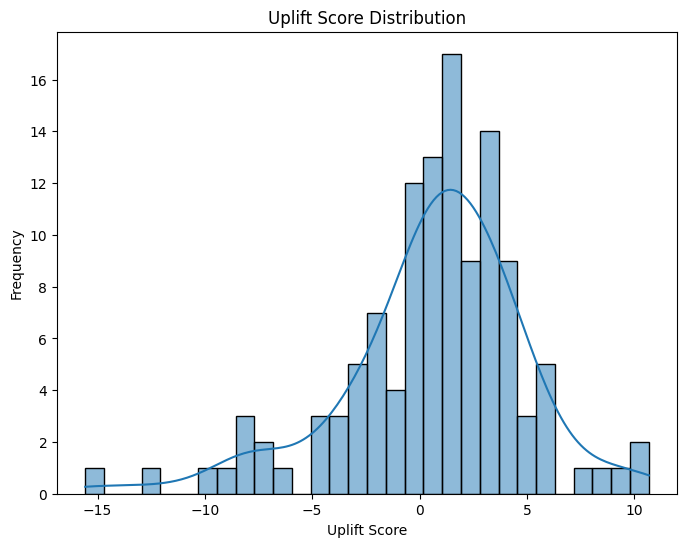

Qini Coefficient: 1.0000


In [119]:
filepath = 'student_data.csv'
    
run_uplift_model(
    filepath=filepath,
    treatment_def_func=define_treatment_studytime,
    n_bins=10
)

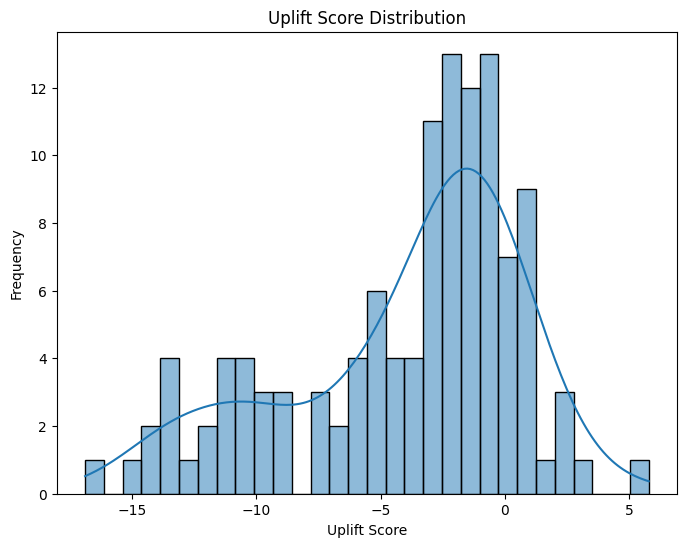

Qini Coefficient: 1.0000


In [120]:
run_uplift_model(
    filepath=filepath,
    treatment_def_func=define_treatment_fail,
    n_bins=10
)

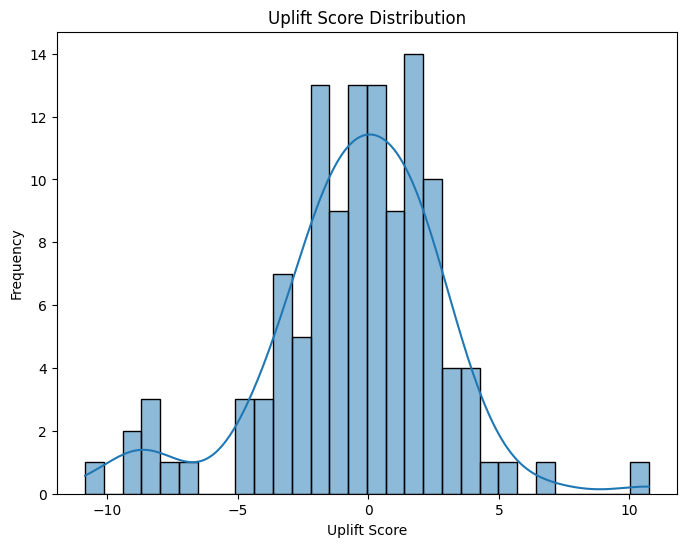

Qini Coefficient: 1.0000


In [121]:
run_uplift_model(
    filepath=filepath,
    treatment_def_func=define_treatment_father_education,
    n_bins=10
)

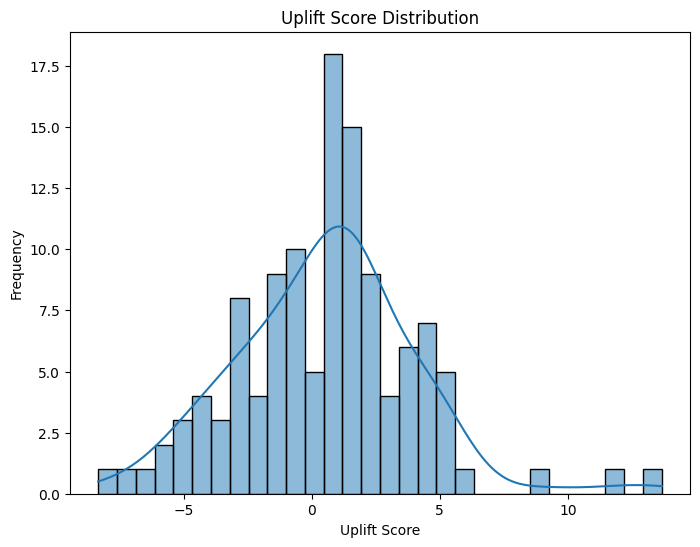

Qini Coefficient: 1.0000


In [122]:
run_uplift_model(
    filepath=filepath,
    treatment_def_func=define_treatment_mother_education,
    n_bins=10
)

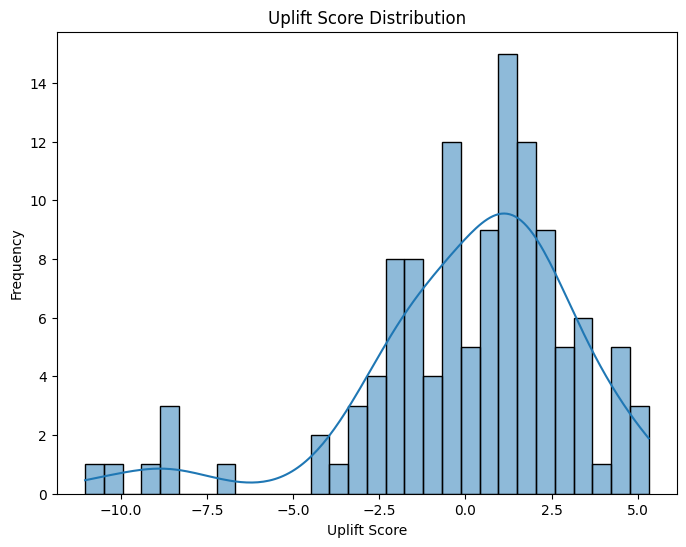

Qini Coefficient: 1.0000


In [123]:
run_uplift_model(
    filepath=filepath,
    treatment_def_func=define_treatment_absences,
    n_bins=10
)